
# 1. IMPORT

In [94]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelBinarizer

In [95]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout,Conv1D,Conv2D,MaxPool2D# importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [96]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [97]:
train='./KDDTrain+.txt'
test='./KDDTest+.txt'
data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
df= pd.concat([data, test_data], ignore_index=True)

In [98]:
# phân loại lớp 
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(df)
# change_label(test_data)

In [99]:
# xóa 'difficulty_level'
df.drop(['difficulty'],axis=1,inplace=True)
#test_data.drop(['difficulty'],axis=1,inplace=True)


# 2. BIẾN ĐỔI VÀ CHUẨN HÓA

In [100]:
# one-hot-encoding categorical columns
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="",dtype=int)  
#print(data.shape)
#test_data = pd.get_dummies(test_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  

In [101]:
# tạo datafreame labels (Dos,Probe,R2L,U2R,normal)
label = pd.DataFrame(df.label)
#label_test = pd.DataFrame(test_data.label)

In [102]:
minmax_scaler = MinMaxScaler()
def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scaler.fit_transform(arr.reshape(len(arr), 1))
    return df
#chuẩn hóa dữ liệu số của data
numeric_col = df.select_dtypes(include='number').columns
df = normalization(df, numeric_col)

In [103]:
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
df['intrusion'] = enc_label
print(df.shape)
df

(148517, 124)


/tmp/ipykernel_3688/2616363727.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['intrusion'] = enc_label


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
148513,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
148514,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
148515,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [ ]:
# Phân 4 loại tấn công của bộ train vào dataframe
# Tạo 4 dataframe mới
DoS_df = pd.DataFrame()
Probe_df = pd.DataFrame()
R2L_df = pd.DataFrame()
U2R_df = pd.DataFrame()
normal_df = pd.DataFrame()

# Nhóm các mẫu theo nhãn và lưu vào các dataframe tương ứng
for label, group in X_train.groupby('label'):
    if label == 'Dos':
        DoS_df = pd.concat([DoS_df, group], axis=0)
    elif label == 'Probe' :
        Probe_df = pd.concat([Probe_df, group], axis=0)
    elif label == 'R2L' :
        R2L_df = pd.concat([R2L_df, group], axis=0)
    elif label == 'U2R' :
        U2R_df = pd.concat([U2R_df, group], axis=0)
    elif label == 'normal':
        normal_df = pd.concat([normal_df, group], axis=0)
DoS_df = pd.concat([DoS_df, normal_df])

In [ ]:
DoS_df.drop(labels= ['label'], axis=1, inplace=True)
Probe_df.drop(labels= ['label'], axis=1, inplace=True)
R2L_df.drop(labels= ['label'], axis=1, inplace=True)
U2R_df.drop(labels= ['label'], axis=1, inplace=True)

In [ ]:
YDoS_train = DoS_df['intrusion']
XDoS_train = DoS_df.drop(labels= ['intrusion'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
YDoS_train = LabelBinarizer().fit_transform(YDoS_train)

XDoS_train=np.array(XDoS_train)
YDoS_train=np.array(YDoS_train)

In [105]:
X_train = df.drop(labels= ['intrusion'], axis=1)
X_train = df.drop(labels= ['label'], axis=1)
y_train = df['intrusion']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [71]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, ( X_train.shape[0], X_train.shape[1],1 ))
X_test = np.reshape(X_test, ( X_test.shape[0],  X_test.shape[1],1 ))

In [14]:
X_train.shape

(133665, 123, 1)

# K-MEANS

In [29]:
Kmeans_clustering =KMeans(n_clusters=8).fit(X_train)
Kmeans_clustered = X_train.copy()
Kmeans_clustered.loc[:,'Cluster'] = Kmeans_clustering.labels_ # append labels to points

/home/tranosa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


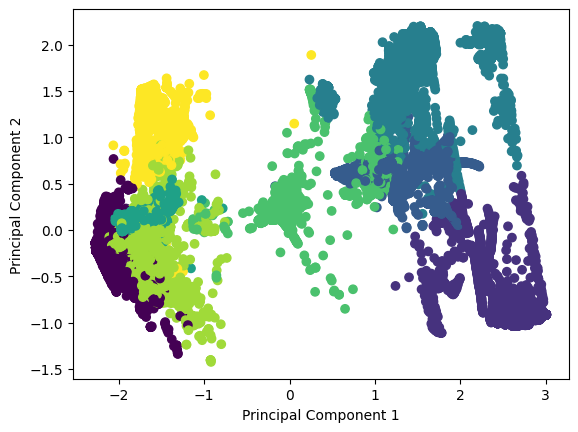

In [30]:
from sklearn.decomposition import PCA

# Giảm số chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Trực quan hóa dữ liệu với scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Kmeans_clustering.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [31]:
# Convert target variable to binary classification
y = y_train.apply(lambda x: 'normal' if x == 4 else 'attack')

# Label the data points with cluster IDs
labels = Kmeans_clustering.labels_

# Create a DataFrame to store attack points


# Evaluate the clustering with crosstab
print(pd.crosstab(y, labels, rownames=['True Label'], colnames=['Cluster ID']))

Cluster ID      0      1      2      3      4     5      6     7
True Label                                                      
attack          0  37074  12845  17401      3  4071     67     2
normal      42050      0      0      0  15552     0  16487  2965


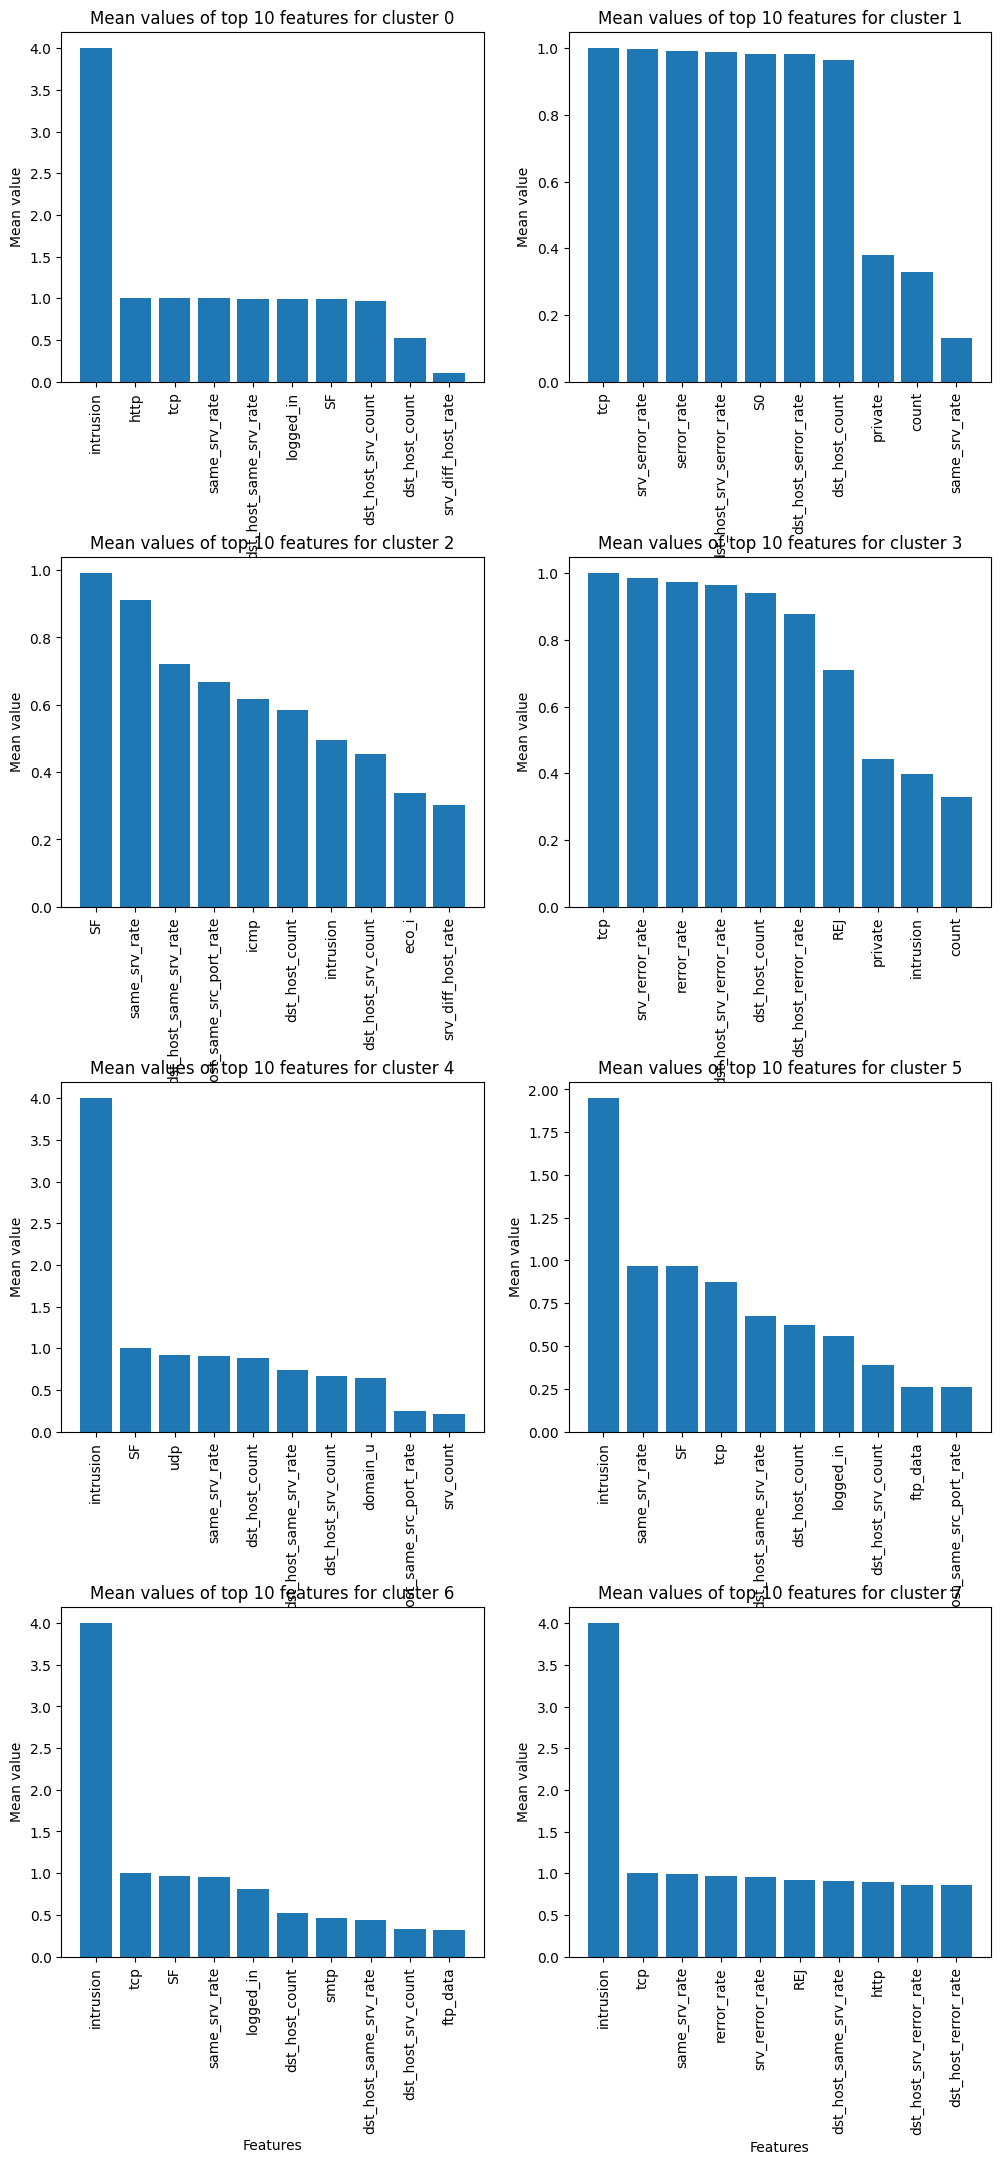

In [32]:
import math
cluster_indices = np.where(Kmeans_clustering.labels_ != -1)
cluster_data = X_train.iloc[cluster_indices]
cluster_labels = y_train.iloc[cluster_indices]
cluster_ids = np.unique(Kmeans_clustering.labels_[cluster_indices])
n_cols = 2  # Số lượng cột của grid subplot
n_rows = math.ceil(len(cluster_ids) / n_cols)  # Số lượng dòng của grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(150, 250))  # Kích thước của grid subplot
axes = axes.flatten()  # Chuyển grid subplot thành một mảng 1 chiều để dễ truy cập
for i, cluster_id in enumerate(cluster_ids):
    # Lọc dữ liệu thuộc cụm hiện tại
    indices = np.where(Kmeans_clustering.labels_ == cluster_id)
    data = X_train.iloc[indices]
    labels = y_train.iloc[indices]
    # Tính số lượng mẫu và số lượng đặc trưng
    n_samples, n_features = data.shape
    # Tính mean và std cho từng đặc trưng
    feature_means = np.mean(data, axis=0)
    feature_stds = np.std(data, axis=0)
    # Sắp xếp các đặc trưng theo thứ tự giảm dần
    feature_order = np.argsort(feature_means)[::-1]
    # Vẽ biểu đồ cho cụm hiện tại
    ax = axes[i]  # Truy cập subplot tương ứng
    ax.bar(range(10), feature_means[feature_order][:10])
    ax.set_xticks(range(10))
    ax.set_xticklabels(X_train.columns[feature_order][:10], rotation=90)
    ax.set_xlabel('Features')
    ax.set_ylabel('Mean value')
    ax.set_title(f'Mean values of top 10 features for cluster {cluster_id}')
    fig.set_size_inches(12, 25)
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


In [49]:
Train_kmeansPredict = Kmeans_clustering.fit_predict(X_train)
pd.crosstab(y_train, Train_kmeansPredict, rownames=['Types of attack'], colnames=['Clusters'])

/home/tranosa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters,0,1,2,3,4,5,6,7
Types of attack,,,,,,,,
0,0,36320,10576,6491,0,0,0,0
1,0,753,6719,6605,0,0,0,0
2,5,2,181,1414,2273,2,0,3
3,0,0,0,0,116,0,0,3
4,42051,0,0,0,16358,2973,11731,3941


# MÔ HÌNH MARKOV

In [117]:
print(y_train.unique())
n_states = len(y_train.unique())

[4 0 2 1 3]


In [118]:
means = np.mean(X_train, axis=0)
means

duration          0.004796
src_bytes         0.000029
dst_bytes         0.000013
land              0.000215
wrong_fragment    0.006841
                    ...   
S2                0.000956
S3                0.002007
SF                0.604779
SH                0.002316
intrusion         2.224728
Length: 123, dtype: float64

In [119]:
convarience = np.cov(X_train.T)
covars = 0.1 * convarience
covars.shape

(123, 123)

In [120]:
transmat_counts = np.zeros((n_states, n_states))
for i in range(1, len(y_train)):
    current_state = y_train[i - 1]
    next_state = y_train[i]
    transmat_counts[current_state, next_state] += 1
transmat = transmat_counts / np.sum(transmat_counts, axis=1, keepdims=True)
transmat.shape

(5, 5)

In [121]:
state_counts = [len(np.where(y_train == i)[0]) for i in range(n_states)]
startprob = np.array(state_counts) / len(y_train)
startprob

array([0.35946727, 0.09478376, 0.02612496, 0.00080126, 0.51882276])

In [122]:
from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=n_states, covariance_type="tied", n_iter=10, means_prior=means, covars_prior=covars, transmat_prior=transmat, startprob_prior=startprob)

In [ ]:
model.fit(X_train)

# MÔ HÌNH CNN

In [72]:
# create CNN model
model1 = Sequential()
# add convolutional layer with 32 filters, kernel size of 3x3 and activation function ReLU
model1.add(Conv1D(32, kernel_size=3,activation='relu', input_shape=( X_train.shape[1],X_train.shape[2])))

# add max pooling layer
model1.add(MaxPool1D(pool_size=3))

# add flatten layer to convert output of convolutional layer to 1D array
model1.add(Flatten())


# add dense layer with 128 neurons and activation function ReLU
model1.add(Dense(128, activation='relu'))

# add dropout layer with rate of 0.2 to prevent overfitting
model1.add(Dropout(0.2))

# add output layer with 1 neuron and sigmoid activation function for binary classification
model1.add(Dense(1, activation='sigmoid'))

# compile model with binary crossentropy loss function and Adam optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 121, 32)           128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 40, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      